<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Стиль-заголовков" data-toc-modified-id="Стиль-заголовков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Стиль заголовков</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li></ul></li><li><span><a href="#Расчеты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчеты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчеты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-параметров:-площадь,-цена,-число-комнат,-высота-потолков" data-toc-modified-id="Исследование-параметров:-площадь,-цена,-число-комнат,-высота-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Исследование параметров: площадь, цена, число комнат, высота потолков</a></span></li><li><span><a href="#Изучим-время-продажи-квартиры." data-toc-modified-id="Изучим-время-продажи-квартиры.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучим время продажи квартиры.</a></span></li><li><span><a href="#Очистка-датафрейма-от-выбросов" data-toc-modified-id="Очистка-датафрейма-от-выбросов-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Очистка датафрейма от выбросов</a></span></li><li><span><a href="#Исследование-факторов,-влияющих-на-стоимость-квартиры" data-toc-modified-id="Исследование-факторов,-влияющих-на-стоимость-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Исследование факторов, влияющих на стоимость квартиры</a></span></li><li><span><a href="#Исследование-наиболее-населенных-пунктов." data-toc-modified-id="Исследование-наиболее-населенных-пунктов.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Исследование наиболее населенных пунктов.</a></span></li><li><span><a href="#Исследование-недвижимости-Санкт-Петербурга" data-toc-modified-id="Исследование-недвижимости-Санкт-Петербурга-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Исследование недвижимости Санкт-Петербурга</a></span></li><li><span><a href="#Исследование-недвижимости-центральной-части-Санкт-Петербурга" data-toc-modified-id="Исследование-недвижимости-центральной-части-Санкт-Петербурга-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Исследование недвижимости центральной части Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

data_sale = pd.read_csv('real_estate_data.csv', sep = '\t')
data_sale.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Посмотрим общую информацию по датафрейму.

In [2]:
data_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Датасет содержит информацию о продаваемых квартирах в Санкт-Петербурге и соседних населенных пунктах за несколько лет. Каждая строка содержит данные об одной квартире, столбцы - характерные для недвижимости признаки. Общая длина датафрейма равна 23699 строкам, количество столбцов - 22. Во многих столбцах есть пропуски в данных.

Столбцы содержат данные разных типов: 2 признака — логические (bool), 3 признака имеют тип object и 17 признаков — числовые. 
В некоторых столбцах изменим типы данных:
- данные в `first_day_exposition`, содержащем информацию о дате дата премьеры фильма, переведем в формат datetime;
- данные в `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition` записаны вещественным числом, изменим их на целочисленный.

В названиях колонок есть нарушения стиля:

- строчные буквы сочетаются с прописными;

- колонка `cityCenters_nearest` написана в "верблюжьей" нотации.

Выведем основные статистические характеристики данных по числовому признаку: число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [3]:
data_sale.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Посмотрим статистику по нечисловым признакам.

In [4]:
data_sale.describe(include=['object', 'bool'])

,first_day_exposition,is_apartment,studio,open_plan,locality_name
count,23699,2775,23699,23699,23650
unique,1491,2,2,2,364
top,2018-02-01T00:00:00,False,False,False,Санкт-Петербург
freq,368,2725,23550,23632,15721


**Выводы**

Посмотрим на данные в тех столбцах, которые предствляют интерес для текущего исследования:

1. В столбце `last_price`, содержащем информацию о цене квартиры на момент снятия с публикации, нет пропусков. Но встречаются аномальные значения: минимальная цена равна 12190 рублям, а максимальная - 763000000 рублям. Большое значение отклонения, равное 10887010 рублям, указывает на больший разброс значений от средней величины.

2. В столбце `total_area`, содержащем площадь квартиры в квадратных метрах, также нет пропущенных значений. Разброс значений очень большой: от 12 м² до 900 м².

3. В столбце `rooms`, содержащем информацию о числе комнат в квартире, пропусков нет. Разброс значений от 0 до 19. Нулевое значение числа комнат, вероятно, связано с типом квартиры "студия".

4. В столбце `ceiling_height`, содержащем высоту потолков, много пропусков в данных. Встречаются аномальные значения: минимальное высота равна 1 м, а максимальная - 100 м. Вероятно, ошибки связаны с тем, что ввод данных производился вручную. 

5. В столбцах `living_area` и `kitchen_area` есть пропуски. Но зная, сколько составляет общая площадь квартиры, можно оценить, сколько квадратных метров составляют жилая площадь и площадь кухни.

6. Столбец `balcony` содержит много пропусков. Скорее всего, для квартир без балконов это поле не заполнялось.

7. В столбце `locality_name`с названием населённого пункта пропуски есть, но их немного. 


## Предобработка данных

### Стиль заголовков

Исправим стиль в заголовках столбцов. 

Приведем названия в соответствие с хорошим стилем:
* названия колонок запишем в «змеином_регистре»,
* все символы сделаем строчными.

Для этого переименуем колонки так:
* `'cityCenters_nearest'` → `'city_сenters_nearest'`;
* `'parks_around3000'` → `'parks_around_3000'`;
* `'ponds_around3000'` → `'ponds_around_3000'`.

In [5]:
data_sale = data_sale.rename(columns = {'cityCenters_nearest': 'city_сenters_nearest', 
                         'parks_around3000': 'parks_around_3000', 
                         'ponds_around3000': 'ponds_around_3000'})

Проверим результат. Для этого ещё раз выведем на экран названия столбцов.

In [6]:
data_sale.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Обработка пропусков

Посмотрим, сколько в таблице пропущенных значений:

In [7]:
data_sale.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Также оценим долевое соотношение пропусков относительно общей длины датафрейма:

In [8]:
data_sale.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
city_сenters_nearest    0.232879
parks_around_3000       0.232837
parks_nearest           0.659100
ponds_around_3000       0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

1. В столбце `ceiling_height` 38,8% пропусков. Высота потолков чаще всего зависит от типа дома: для "сталинки" стандартная величина 3-3,5 м, в "хрущевках" стандартная высота не превышает 2,5 м, новостройки отличаются высотой перекрытий в 2,7 м. К сожалению, в датафрейме не указан тип дома, и заполнить пропуски по этому признаку не удастся. Для заполнения пропущенных значений в этом столбце распределим дома по этажности, а затем заполним пропуски медианными значениями для каждой из подгрупп. 

2. В столбце `floors_total` 0,36% пропусков, такое количество мало относительно общей длины датафрейма, и можно просто оставить такие ячейки незаполненными. 

3. Столбцы `living_area` и `kitchen_area` содержат 8,02% и 9,6% пропусков, соответственно. Зная, сколько составляет общая площадь квартиры, можно оценить, сколько квадратных метров составляет жилая площадь и площадь кухни.

4. Столбец `balcony` содержит 48,6% пропусков, их заменим на 0, т.к. предполагается, что если человек не указал в объявлении количество балконов, то их нет.

5. В столбце `locality_name`с названием населённого пункта 2,1% пропусков, такое количество мало относительно общей длины датафрейма, и можно просто оставить такие ячейки незаполненными. 

6. Столбец `city_сenters_nearest` содержит 23,3% пропусков. Пропуски  можно восстановить по имеющимся картографическим данным.

1. Заполним пропуски в столбце `ceiling_height`

Для заполения пропусков распределим дома по этажности, а затем заполним пропуски в столбце `ceiling_height` медианными значениями для каждой из подгрупп.

In [9]:
median_height_pivot = data_sale.pivot_table(index = 'floors_total', values = 'ceiling_height', aggfunc = 'median')
median_height_pivot.head(3)

,ceiling_height
floors_total,
1.0,2.8
2.0,2.7
3.0,2.8


In [10]:
display('Пропущенных значений было: {}'.format(data_sale['ceiling_height'].isna().sum()))

for floors in median_height_pivot.index:
    
    data_sale.loc[(data_sale['ceiling_height'].isna()) & 
             (data_sale['floors_total'] == floors), 
             'ceiling_height'] = median_height_pivot.loc[floors, 'ceiling_height']
        
display('Пропущенных значений стало: {}'.format(data_sale['ceiling_height'].isna().sum()))

'Пропущенных значений было: 9195'

'Пропущенных значений стало: 78'

Незаполненными оказались те ячейки, для которых в соответствующих значениях столбца `floors_total` отсутствуют данные об этажности дома или для дома соотвествующей этажности нет информации о высоте потолков.

Заполним оставшиеся значениями медианой:

In [11]:
data_sale.loc[data_sale['ceiling_height'].isna(), 'ceiling_height'] = median_height_pivot['ceiling_height'].median()

Проверим, что все значения в столбце `ceiling_height` оказались заполнены:

In [12]:
data_sale['ceiling_height'].isna().sum()

0

2. Заполним пропуски в столбце `living_area`

Жилой является площадь комнат, предназначенных, для постоянного проживания, то есть гостиных и спален. Таким образом, зная общую площадь квартиры и площадь кухни, можно вычислить жилую площадь. 

In [13]:
display('Пропущенных значений было: {}'.format(data_sale['living_area'].isna().sum()))

data_sale.loc[data_sale['living_area'].isna(), 'living_area'] = data_sale['total_area'] - data_sale['kitchen_area']

display('Пропущенных значений стало: {}'.format(data_sale['living_area'].isna().sum()))

'Пропущенных значений было: 1903'

'Пропущенных значений стало: 1464'

Оставшиеся пропуски заполним из предположения, что площадь жилого помещения зависит от общей площади квартиры. Таким образом, рассчитаем процент, который составляет жилая площадь от общей для строк без пропусков, затем найдем медиану, домножим ее на общую площадь квартиры и заполним пропуски.

In [14]:
data_sale_new = data_sale[~(data_sale['living_area'].isna())]

median_living_area_pivot = data_sale_new.pivot_table(index = 'total_area', values = 'living_area', aggfunc = 'median')
median_living_area_pivot['percent_area'] = median_living_area_pivot['living_area']/median_living_area_pivot.index

median_living_area_pivot.head(3)

,living_area,percent_area
total_area,,
12.0,10.0,0.833333
13.0,10.0,0.769231
14.0,11.0,0.785714


In [15]:
for area in median_living_area_pivot.index:
    
    data_sale.loc[(data_sale['living_area'].isna()) & 
             (data_sale['total_area'] == area), 
             'living_area'] = median_living_area_pivot.loc[area, 'percent_area']*area

In [16]:
display('Пропущенных значений стало: {}'.format(data_sale['living_area'].isna().sum()))

'Пропущенных значений стало: 53'

Незаполненными оказались те ячейки, для которых в соответствующих значениях столбца `total_area` отсутствуют данные о жилой площади квартиры.

Найдем медианные значения столбца `living_area` для квартир с разным количеством комнат.

In [17]:
rooms_median_pivot = data_sale.pivot_table(index = 'rooms', values = 'living_area', aggfunc = 'median')

Заполним пропуски:

In [18]:
for rooms in rooms_median_pivot.index:
    
    data_sale.loc[(data_sale['living_area'].isna()) & 
             (data_sale['rooms'] == rooms), 
             'living_area'] = rooms_median_pivot.loc[rooms, 'living_area']

Проверим, что незаполненных ячеек в стобце `living_area` не осталось:

In [19]:
'Пропущенных значений стало: {}'.format(data_sale['living_area'].isna().sum())

'Пропущенных значений стало: 0'

3. Заполним пропуски в столбце `kitchen_area`

Пропуски в столбце `kitchen_area` заполним по тому же принципу, что и в `living_area`: зная общую площадь квартиры и площадь жилых помещений, вычислим площадь кухни. 

In [20]:
display('Пропущенных значений было: {}'.format(data_sale['kitchen_area'].isna().sum()))

data_sale.loc[data_sale['kitchen_area'].isna(), 'kitchen_area'] = data_sale['total_area'] - data_sale['living_area']

display('Пропущенных значений стало: {}'.format(data_sale['kitchen_area'].isna().sum()))

'Пропущенных значений было: 2278'

'Пропущенных значений стало: 0'

4. Заполним пропуски в столбце `balcony`

Пропущенные значения в столбце заменим на 0, т.к. предполагается, что если человек не указал в объявлении количество балконов, то их нет.

In [21]:
display('Пропущенных значений было: {}'.format(data_sale['balcony'].isna().sum()))

data_sale.loc[data_sale['balcony'].isna(), 'balcony'] = 0

display('Пропущенных значений стало: {}'.format(data_sale['balcony'].isna().sum()))

'Пропущенных значений было: 11519'

'Пропущенных значений стало: 0'

5. Заполним пропуски в столбце `city_сenters_nearest`

Зная название населенного пункта можно заполнить пропуски в столбце `city_сenters_nearest` средним значением расстояния.

In [22]:
data_sale['locality_name'] = data_sale['locality_name'].str.lower()

In [23]:
median_center_distance_pivot = data_sale.pivot_table(index = 'locality_name', values = 'city_сenters_nearest', aggfunc = 'median')
median_center_distance_pivot.head(3)

,city_сenters_nearest
locality_name,
зеленогорск,53381.0
колпино,32018.0
красное село,29140.5


In [24]:
display('Пропущенных значений было: {}'.format(data_sale['city_сenters_nearest'].isna().sum()))

for city in median_center_distance_pivot.index:
    
    data_sale.loc[(data_sale['city_сenters_nearest'].isna()) & 
             (data_sale['locality_name'] == city), 
             'city_сenters_nearest'] = median_center_distance_pivot.loc[city, 'city_сenters_nearest']
    
display('Пропущенных значений стало: {}'.format(data_sale['city_сenters_nearest'].isna().sum()))

'Пропущенных значений было: 5519'

'Пропущенных значений стало: 5394'

6. Заполним пропуски в столбце `days_exposition`

Посмотрим, как распределены пропуски в столбце с информацией о количестве дней размещения объявления, по времени.

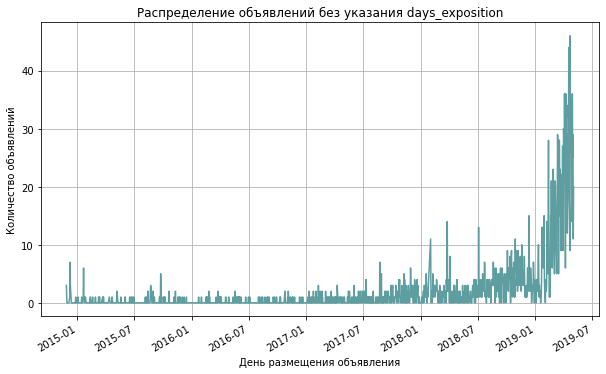

In [25]:
# данные в столбце с датой публикации объявления переведем в формат datetime
data_sale['first_day_exposition'] = pd.to_datetime(data_sale['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# создаем новый столбец, в котором укажем, пропущена дата или нет
data_sale['days_exposition_missing'] = data_sale['days_exposition'].isna().astype(int)
# суммируем и строим график
data_sale.groupby('first_day_exposition')['days_exposition_missing'].sum().plot(color='#5F9EA0', figsize=(10,6), grid=True)

plt.xlabel('День размещения объявления'), plt.ylabel('Количество объявлений'), plt.title('Распределение объявлений без указания days_exposition')
plt.show()

Как видно из графика, количество пропусков растет к концу наблюдаемого периода. Скорее всего, такие объявления актуальны по настоящее время.

Заполним пропуски разностью между датой выгрузки данных и длительностью размещения объявления.

In [26]:
display('Пропуски до {}'.format(data_sale['days_exposition'].isna().sum()))

data_sale.loc[data_sale['days_exposition'].isna(), 'days_exposition'] = (data_sale['first_day_exposition'].max() - data_sale.loc[data_sale['days_exposition'].isna(), 'first_day_exposition']).dt.days

display('Пропуски после {}'.format(data_sale['days_exposition'].isna().sum()))

'Пропуски до 3181'

'Пропуски после 0'

### Изменение типов данных

1. Данные в столбцах `floors_total`, `balcony`, `parks_around_3000`, `ponds_around_3000`, `days_exposition`записаны вещественным числом. Изменим эти данные на целочисленные:

In [27]:
data_sale['floors_total'] = pd.to_numeric(data_sale['floors_total'], errors='coerce').astype('Int64')
data_sale['balcony'] = pd.to_numeric(data_sale['balcony'], errors='coerce').astype('Int64')
data_sale['parks_around_3000'] = pd.to_numeric(data_sale['parks_around_3000'], errors='coerce').astype('Int64')
data_sale['ponds_around_3000'] = pd.to_numeric(data_sale['ponds_around_3000'], errors='coerce').astype('Int64')
#data_sale['days_exposition'] = pd.to_numeric(data_sale['days_exposition'], errors='coerce').astype('Int64')

2. Данные в столбце `is_apartment` изменим на логический тип bool:

In [28]:
data_sale['is_apartment'] = data_sale['is_apartment'].astype(bool)

### Обработка дубликатов

Ранее привели все символы в столбце `locality_name`, содержащего данные строкового типа, к нижнему регистру. Теперь заменим все буквы "ё" на "е", для единообразия записи.


In [29]:
data_sale['locality_name'] = data_sale['locality_name'].replace('ё', 'е', regex=True)

In [30]:
'Всего дубликатов в датафрейме: {}'.format(data_sale.duplicated().sum())

'Всего дубликатов в датафрейме: 0'

**Выводы**

1.  Для заполнения пропущенных значений в столбце `ceiling_height` дома были распределены по этажности, а затем пропуски были заполнены медианными значениями для каждой из подгрупп. 

2. Пропущенные значения в столбце `living_area` были заполнены разностью между общей площадью и кухней. Оставшиеся пропуски были заполнены из предположения, что площадь жилого помещения зависит от общей площади квартиры. Таким образом, был рассчитан процент, который составляет жилая площадь от общей для строк без пропусков, затем найдена медиана, домножив вычисленный процент на общую площадь квартиры, заполнили пропуски.

3. Пропущенные значения в столбце `kitchen_area` были заполнены аналогочно заполнению пропусков в столбце `living_area`.  

4. Пропуски в столбце `balcony` заменили на 0.

5. Зная название населенного пункта заполнили пропуски в столбце `city_сenters_nearest` средним значением расстояния.

6. Пропуски в столбце `days_exposition` заполнили разностью между датой выгрузки данных и длительностью размещения объявления. Предварительно данные в столбце с датой публикации объявления были переведены в формат datetime.

7. Данные в столбцах `floors_total`, `balcony`, `parks_around_3000`, `ponds_around_3000`, `days_exposition`, записанные вещественным числом, именили на целочисленные.

8. Проверили датафрейм на наличие дубликатов.


## Расчеты и добавление результатов в таблицу

1. Добавим в таблицу следующие столбцы:

 - `price_per_meter`, содержащий цены за квадратный метр;
 - `ratio_living_to_total` с соотношением жилой и общей площадей;
 - `ratio_kitchen_to_total` с соотношением площади кухни к общей площади;
 - `day_of_publication` с днём публикации;
 - `month_of_publication` с месяцем публикации;
 - `year_of_publication` с годом публикации.

In [31]:
data_sale['price_per_meter'] = round(data_sale['last_price']/data_sale['total_area'], 0)
data_sale['ratio_living_to_total'] = round(data_sale['living_area']/data_sale['total_area'], 3)
data_sale['ratio_kitchen_to_total'] = round(data_sale['kitchen_area']/data_sale['total_area'], 3)


data_sale['day_of_publication'] = data_sale['first_day_exposition'].dt.weekday
data_sale['month_of_publication'] = data_sale['first_day_exposition'].dt.month
data_sale['year_of_publication'] = data_sale['first_day_exposition'].dt.year

2. Добавим в таблицу столбец с этажом:

In [32]:
data_sale.loc[data_sale['floor'] == 1, 'floor_group'] = 'первый'
data_sale.loc[data_sale['floor'] == data_sale['floors_total'], 'floor_group'] = 'последний'
data_sale.loc[(data_sale['floor_group'] != 'первый') & (data_sale['floor_group'] != 'последний'), 'floor_group'] = 'другой'

In [33]:
data_sale.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,days_exposition_missing,price_per_meter,ratio_living_to_total,ratio_kitchen_to_total,day_of_publication,month_of_publication,year_of_publication,floor_group
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,755.0,57.0,1,120370.0,0.472,0.231,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,True,...,NaN,81.0,0,82921.0,0.460,0.272,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,True,...,574.0,558.0,0,92786.0,0.612,0.148,3,8,2015,другой


## Исследовательский анализ данных

### Исследование параметров: площадь, цена, число комнат, высота потолков

Выведем гистограммы значений площади, цены, числа комнат и высоты потолков.

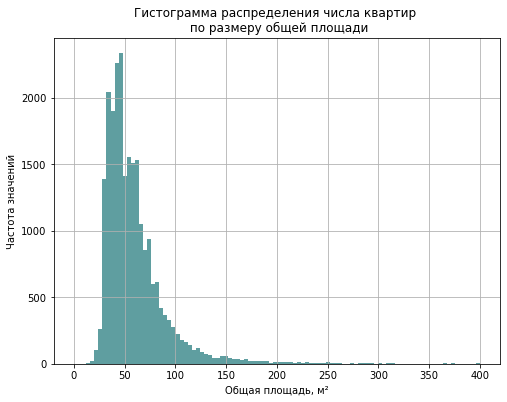

In [34]:
data_sale.hist(column='total_area', grid=True, bins=100, range=(0, 400),figsize=(8, 6), color = '#5F9EA0')
plt.xlabel('Общая площадь, м²'), plt.ylabel('Частота значений'), plt.title('Гистограмма распределения числа квартир \n по размеру общей площади')
plt.show()

In [35]:
display('Среднее составляет {:.1f} м²'.format(data_sale['total_area'].mean()))
display('Медиана составляет {:.1f} м²'.format(data_sale['total_area'].median()))

'Среднее составляет 60.3 м²'

'Медиана составляет 52.0 м²'

Гистограмма ассиметрична: у данных в столбце, содержащем общую площадь квартиры, есть правое плечо. Среднее значение больше медианы - это типично для распределения с правым плечом, поскольку большие значения "тянут" среднее наверх, но не оказывают влияния на медиану. 

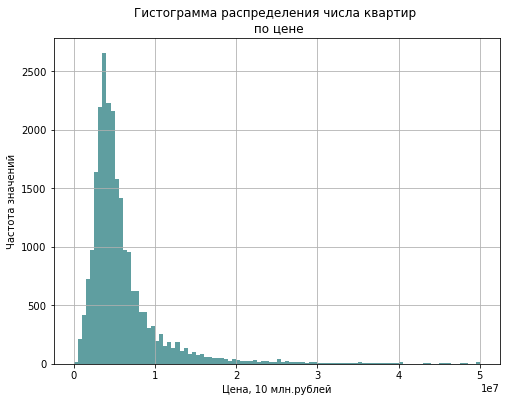

In [36]:
data_sale.hist(column='last_price', grid=True, bins=100, range=(0, 5e7),figsize=(8,6), color = '#5F9EA0')
plt.xlabel('Цена, 10 млн.рублей'), plt.ylabel('Частота значений'), plt.title('Гистограмма распределения числа квартир \n по цене')
plt.show()

In [37]:
display('Среднее составляет {:.1f} млн.руб.'.format(data_sale['last_price'].mean()))
display('Медиана составляет {:.1f} млн.руб.'.format(data_sale['last_price'].median()))

'Среднее составляет 6541548.8 млн.руб.'

'Медиана составляет 4650000.0 млн.руб.'

У данных по цене квартиры также правое плечо: среднее больше медианы. 

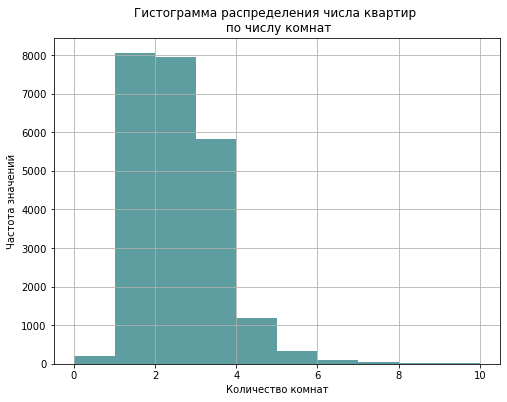

In [38]:
data_sale.hist(column='rooms', grid=True, bins=10, range=(0, 10), figsize=(8,6), color = '#5F9EA0')
plt.xlabel('Количество комнат'), plt.ylabel('Частота значений'), plt.title('Гистограмма распределения числа квартир \n по числу комнат')
plt.show()

In [39]:
display('Среднее составляет {:.1f}'.format(data_sale['rooms'].mean()))
display('Медиана составляет {:.1f}'.format(data_sale['rooms'].median()))

'Среднее составляет 2.1'

'Медиана составляет 2.0'

В распределении по числу комнат среднее и медиана очень близки. Но гистограмму нельзя назвать симметричной: в данных есть выбросы, "тянущие" среднее наверх.

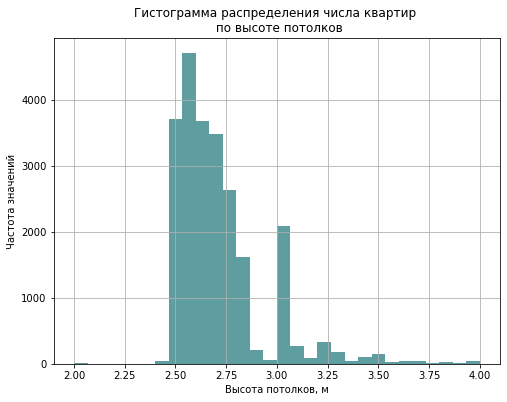

In [40]:
data_sale.hist(column='ceiling_height', grid=True, range=(2, 4), bins=30, figsize=(8,6), color = '#5F9EA0')
plt.xlabel('Высота потолков, м'), plt.ylabel('Частота значений'), plt.title('Гистограмма распределения числа квартир \n по высоте потолков')
plt.show()

In [41]:
display('Среднее составляет {:.1f} м'.format(data_sale['ceiling_height'].mean()))
display('Медиана составляет {:.1f} м'.format(data_sale['ceiling_height'].median()))

'Среднее составляет 2.7 м'

'Медиана составляет 2.6 м'

### Изучим время продажи квартиры.

Временем продажи квартиры будем считать количество дней размещения объявления о продаже на сайте.  

Построим гистограмму распределения квартир по количеству дней размещения объявления.

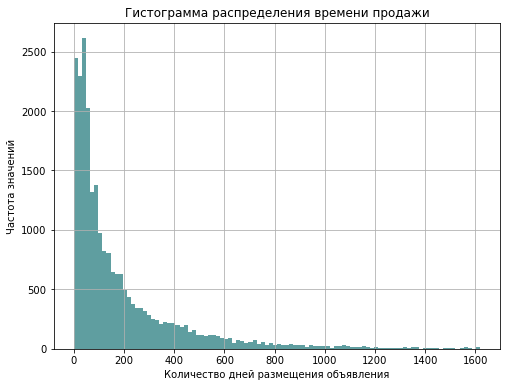

In [42]:
data_sale.hist(column='days_exposition', grid=True, bins=100, figsize=(8,6), color = '#5F9EA0')
plt.xlabel('Количество дней размещения объявления'), plt.ylabel('Частота значений'), plt.title('Гистограмма распределения времени продажи')
plt.show()

In [43]:
display('Среднее составляет {:.1f} дней'.format(data_sale['days_exposition'].mean()))
display('Медиана составляет {:.1f} дней'.format(data_sale['days_exposition'].median()))

'Среднее составляет 185.8 дней'

'Медиана составляет 94.0 дней'

Гистограмма ассиметрична: среднее значение почти в два раза превосходит медиану. Это говорит о том, что в распределении длинный "хвост" высоких значений, влияющих на среднее, но не на медиану.

Построим диаграмму размаха для времени продажи квартиры.

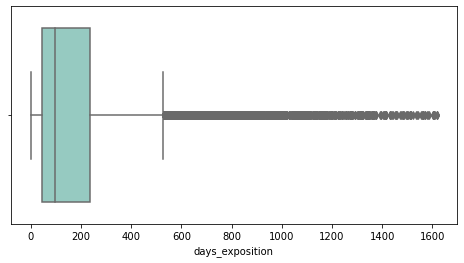

In [44]:
plt.figure(figsize = (8,4))
sns.boxplot(x='days_exposition', data=data_sale, palette='Set3')
plt.show()

Нижний «ус» упирается в 0, это минимальное значение. Верхний заканчивается около 530 дней — это 1.5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов в данных много.

Посмотрим, в течение какого времени продается наибольшее число квартир:

In [45]:
display('Среднее составляет {:.1f} дней'.format(data_sale['days_exposition'].mean()))
display('Медиана составляет {:.1f} дней'.format(data_sale['days_exposition'].median()))

'Среднее составляет 185.8 дней'

'Медиана составляет 94.0 дней'

Видим, что чаще всего квартиры продаются за 45 и 60 дней. Далее следуют квартиры, проданные за очень короткий промежуток времени: до недели.
### Очистка датафрейма от выбросов
Напишем функцию, с помощью которой удалим выбросы из датафрейма по указанному в качестве параметра столбцу.

In [46]:
def cleaned_data(df, column_name):
    
    '''Удаляет выбросы из датафрейма по столбцам. Выбросами считаем все, что находится за пределами [Q1, Q3],
    где Q1 - первый квартиль;
        Q3 - третий квартиль.
    '''
    
    q_1 = df[column_name].quantile(0.25) # первый квартиль
    q_3 = df[column_name].quantile(0.75) # третий квартиль
    min_value = df[column_name].min()
    max_value = df[column_name].max()
    
    iqr = q_3 - q_1 # межквартильный размах
    
    left  = q_1 - 1.5*iqr # левый ус
    right = q_3 + 1.5*iqr # правый ус
    
    if left < min_value:
        left = min_value
    if right > max_value:
        right = max_value
    
    filter_data = (df[column_name] > left) & (df[column_name] < right)
    return df.loc[filter_data]                                                     

Очистим датафрейм от выбросов. Для этого циклом пройдемся по всем интересующим нас столбцам и для каждого из них применим написанную ранее функцию cleaned_data():

In [47]:
list_columns = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']

data_cleaned = data_sale

for column in list_columns:
    
    data_cleaned = cleaned_data(data_cleaned, column)

In [48]:
'Из {} строк осталось {}'.format(len(data_sale), len(data_cleaned))

'Из 23699 строк осталось 18387'

Построим 2 гистограммы: по исходным данным "raw" и новым "filtered".

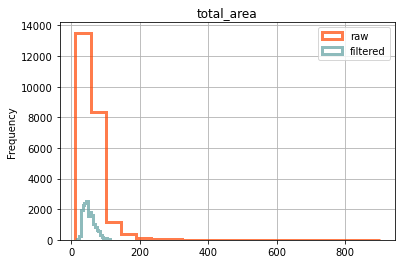

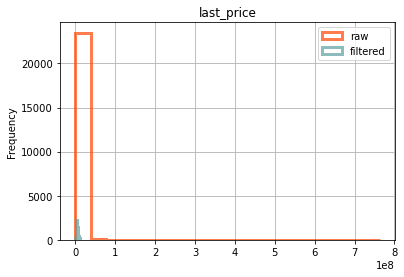

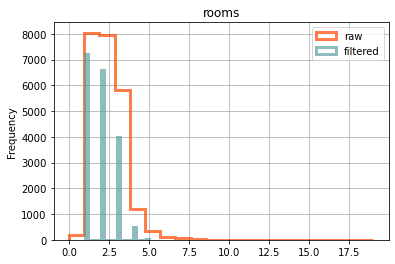

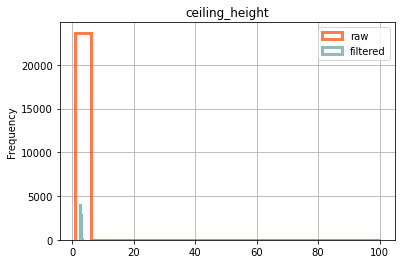

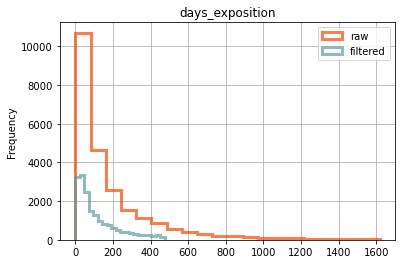

In [49]:
for column in list_columns:
    ax = data_sale.plot(
    kind='hist',
    y=column,
    histtype='step',
    range=(data_sale[column].min(), data_sale[column].max()),
    bins=20,
    linewidth=3,
    alpha=0.7,
    label='raw',
    title =column,
    color='#FF4500'

    )
    data_cleaned.plot(
    kind='hist',
    y=column,
    histtype='step',
    range=(data_cleaned[column].min(), data_cleaned[column].max()),
    bins=20,
    linewidth=3,
    alpha=0.7,
    label='filtered',
    ax=ax,
    grid=True,
    legend=True,
    color = '#5F9EA0'
    ) 

Видна огромная разница для очищенных и неочищенных данных. Отсеяв все лишнее, получили более реалистичные распределения.
Построим гистограммы только для очищенных от аномальных значений данных и посмотрим внимательнее, как изменились распределения.

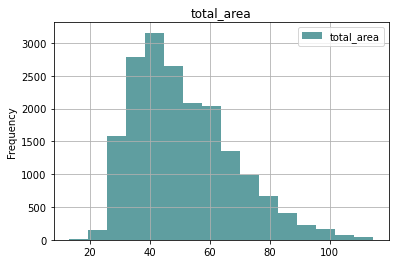

'Среднее составляет 51.4'

'Медиана составляет 47.6'

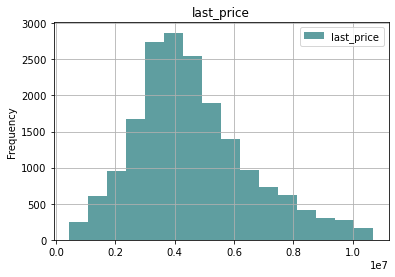

'Среднее составляет 4606070.4'

'Медиана составляет 4300000.0'

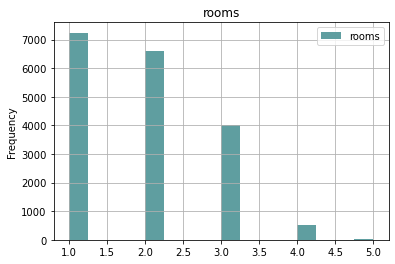

'Среднее составляет 1.9'

'Медиана составляет 2.0'

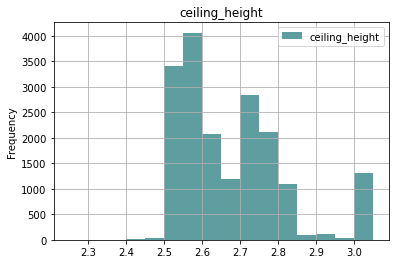

'Среднее составляет 2.7'

'Медиана составляет 2.6'

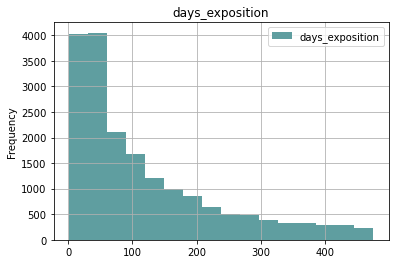

'Среднее составляет 118.4'

'Медиана составляет 74.0'

In [50]:
for column in list_columns:
    
    data_cleaned.plot(
    kind='hist',
    y=column,
    bins=int(np.ceil(np.log2(len(data_cleaned[column]))) + 1),
    range=(data_cleaned[column].min(), data_cleaned[column].max()),
    color = '#5F9EA0',
    grid = True,
    title = column
    ) 
    plt.show()
    display('Среднее составляет {:.1f}'.format(data_cleaned[column].mean()))
    display('Медиана составляет {:.1f}'.format(data_cleaned[column].median()))

Данные в столбцах `total_area`, `last_price`, `rooms` и `ceiling_heights` приблизительно нормальные и симметричные с близкими средним и медианой.
А вот распределение данных в столбце `days_exposition` по-прежнему ассиметрично. Вероятно, это связано с тем, что многие объявления еще актуальны, а квартиры не проданы. Но иногда покупки, действительно, осуществляются в очень сжатые сроки, и нередко спешка - основной показатель мошеннических схем. 
По данным одной из риелторских компаний, средний срок продажи квартиры равен 118 дням. Отбросим все объявления, у которых количество дней размещения меньше двух недель.

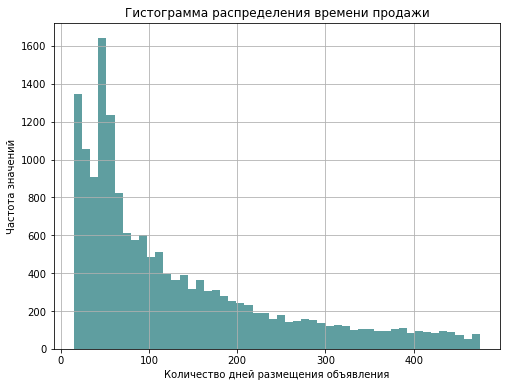

'Среднее составляет 131.0'

'Медиана составляет 89.0'

In [51]:
data_cleaned = data_cleaned.query('days_exposition > 14')

data_cleaned.hist(column='days_exposition', grid=True, bins=50, figsize=(8,6), color = '#5F9EA0')
plt.xlabel('Количество дней размещения объявления'), plt.ylabel('Частота значений'), plt.title('Гистограмма распределения времени продажи')
plt.show()
display('Среднее составляет {:.1f}'.format(data_cleaned['days_exposition'].mean()))
display('Медиана составляет {:.1f}'.format(data_cleaned['days_exposition'].median()))


**Выводы**

Были изучены следующие параметры: площадь, цена, число комнат, высота потолков, время продажи квартиры. Построены гистограммы для каждого параметра. Все гистограммы были асимметричны, что говорит о наличии аномально больших значений, влияющих на среднее.

Все редкие и выбивающиеся значения были убраны из датафрейма. Отсеяв все лишнее, получили более реалистичные распределения.

Получили следующие параметры "средней" квартиры, выставленной на продажу:

- площадь квартиры равна 47,6 м²;
- количество комнат равно 2;
- высота потолков равна 2,6 м;
- цена равна 4,3 млн.рублей;
- время продажи около 86 дней.

### Исследование факторов, влияющих на стоимость квартиры

1. Анализ отношений между числовыми переменными

Посмотрим, зависит ли цена квартиры от её площади, числа комнат и удалённости от центра 

Для начала выведем матрицу корреляции для параметов квартиры и ее цены.

In [52]:
(data_cleaned[['last_price','total_area','rooms', 'city_сenters_nearest']]
.corr()['last_price']
.to_frame()
.sort_values('last_price', ascending=False)
.style
.background_gradient(cmap="Blues"))

,last_price
last_price,1.000000
total_area,0.665053
rooms,0.406691
city_сenters_nearest,-0.315245


1. Видим, что наиболее тесная и значимая зависимость наблюдается между стоимостью квартиры и её площадью: чем больше площадь, тем выше цена. Корелляция положительная, коэффициент корреляции равен 0,66.

2. Для цены и числа комнат корреляция так же положительная, но не такая явная: коэффициент равен 0,41.  

3. Стоимость квартиры зависит и от расстояния до центра, но не сильно. Корреляция отрицательная, т.е. высоким значениям цены соответствует более низкие значения расстояния, коэффициент равен -0,32.

Построим диаграммы рассеяния для этих параметров:

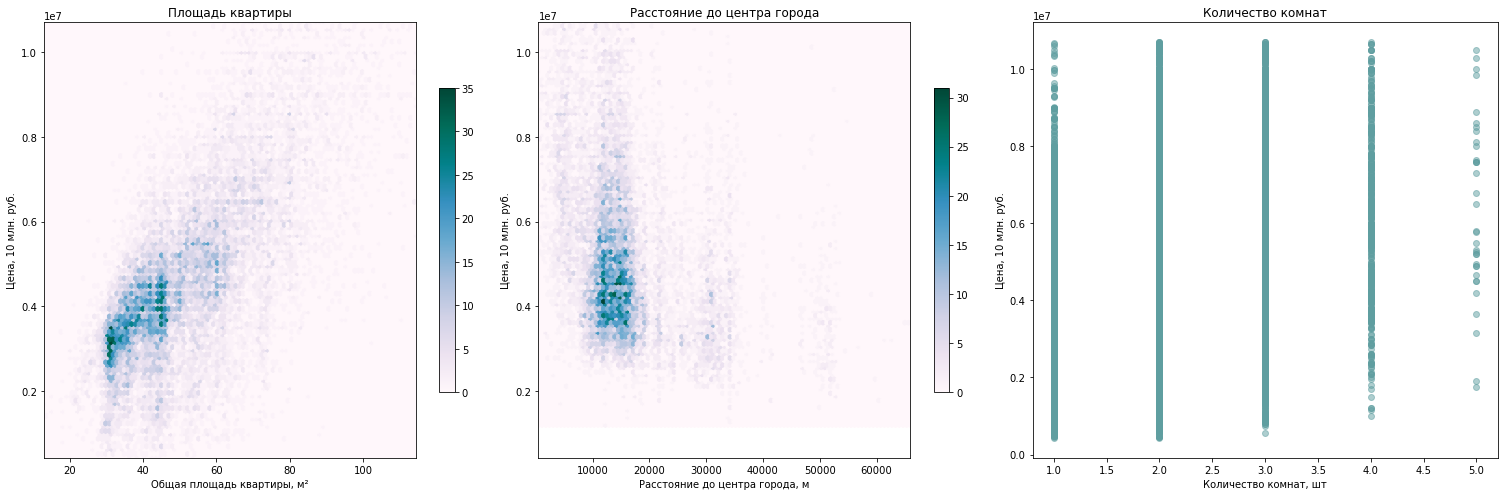

In [53]:
xmin_1 = data_cleaned['total_area'].min()
xmax_1 = data_cleaned['total_area'].max()
ymin_1 = data_cleaned['last_price'].min()
ymax_1 = data_cleaned['last_price'].max()

xmin_2 = data_cleaned['city_сenters_nearest'].min()
xmax_2 = data_cleaned['city_сenters_nearest'].max()


fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(21, 7))


ax1.set_title('Площадь квартиры')
ax1.set_ylabel('Цена, 10 млн. руб.')
ax1.set_xlabel('Общая площадь квартиры, м²')
hb1 = ax1.hexbin(data_cleaned['total_area'], data_cleaned['last_price'], cmap='PuBuGn')
ax1.set(xlim=(xmin_1, xmax_1), ylim=(ymin_1, ymax_1))
cb1 = fig.colorbar(hb1, ax=ax1,shrink=0.7)

ax2.set_title('Расстояние до центра города')
ax2.set_ylabel('Цена, 10 млн. руб.')
ax2.set_xlabel('Расстояние до центра города, м')
hb2 = ax2.hexbin(data_cleaned['city_сenters_nearest'], data_cleaned['last_price'], cmap='PuBuGn')
ax2.set(xlim=(xmin_2, xmax_2), ylim=(ymin_1, ymax_1))
cb2 = fig.colorbar(hb2, ax=ax2,shrink=0.7)

ax3.set_title('Количество комнат')
ax3.set_ylabel('Цена, 10 млн. руб.')
ax3.set_xlabel('Количество комнат, шт')
hb3 = ax3.scatter(data_cleaned['rooms'], data_cleaned['last_price'], c='#5F9EA0', alpha=0.5)

plt.tight_layout()
plt.show()


1. Из первого графика видим, что цена квартиры практически линейно зависит от её площади: чем больше площадь, тем больше стоимость.

2. Из второго графика видно, что большинство квартир расположено на расстоянии от 10 до 20 км от центра, разброс цен для этой удаленности самый широкий. Но все-таки корреляция этих двух параметров не так сильно проявляется, как в предыдущем случае. 

3. На третьем графике явно видно, что с увеличением числа комнат увеличивается и стоимость квартиры. Самый популярный тип недвижимости - 1-комнатные и 2-комнтаные квартиры.

2. Анализ отношений между числовыми и категориальными переменными

Изучим зависимость цены от того, на каком этаже расположена квартира.

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


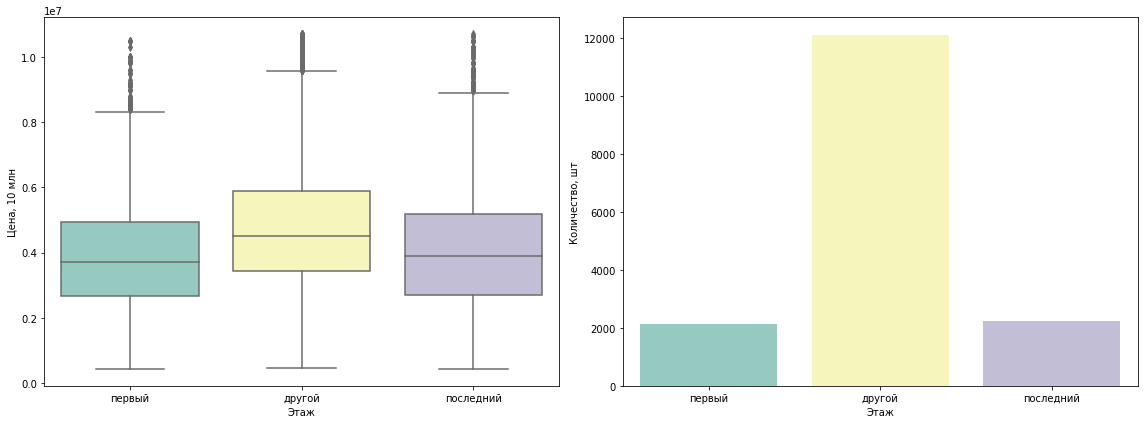

In [54]:
f, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(y="last_price", 
            x="floor_group", 
            orient='v', 
            data=data_cleaned, 
            palette="Set3",
            ax=axes[0]).set(xlabel='Этаж', ylabel='Цена, 10 млн')

sns.countplot(data_cleaned['floor_group'],  
              orient='v',
              palette="Set3",
              ax=axes[1]).set(xlabel='Этаж', ylabel='Количество, шт')

plt.tight_layout()
plt.show()

Видим, что стоимость квартир на первых и последних этажах ниже чем у квартир, расположенных на средних этажах здания.

2.1. Посмотрим, есть ли зависимость цены квартиры от даты размещения: дня недели, месяца и года.

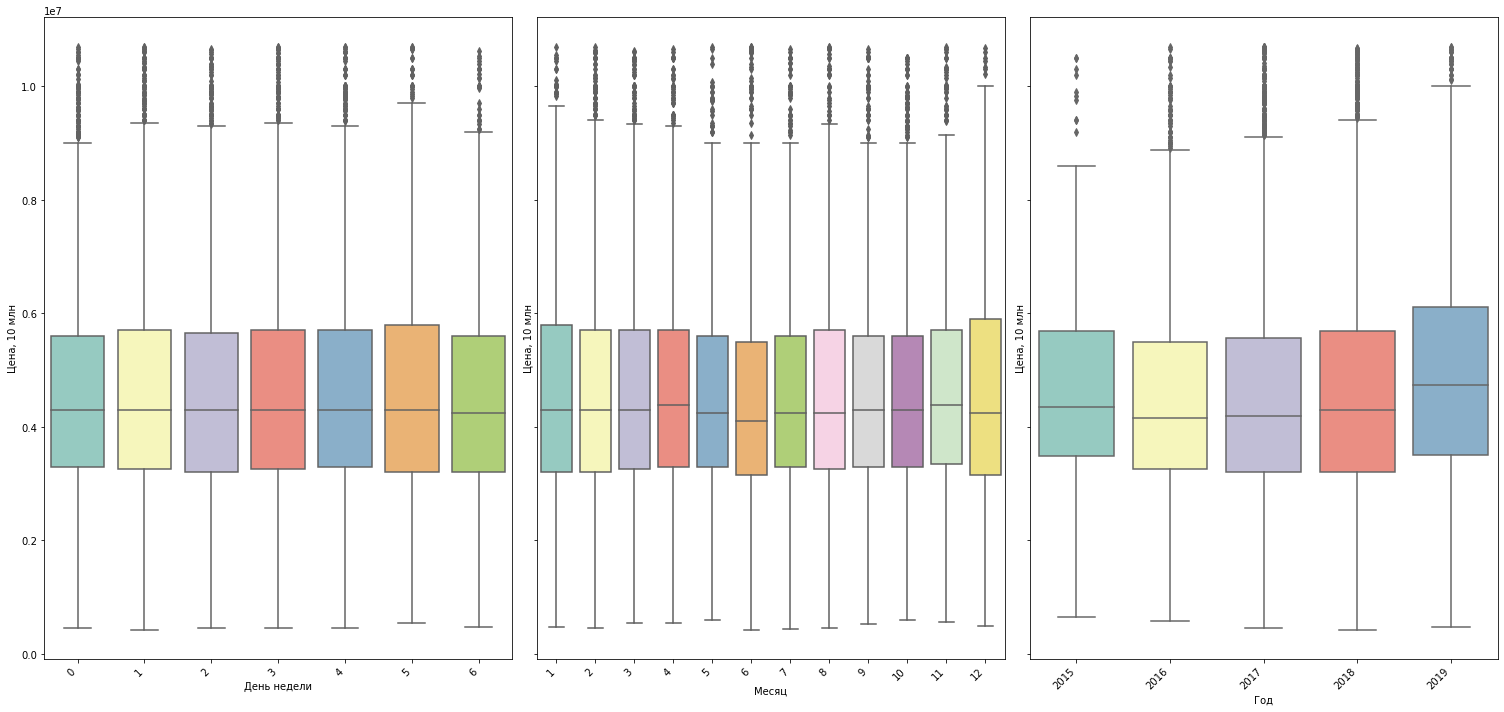

In [55]:
#dict_weekdays = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'} 

#for key in dict_weekdays:
    #data_cleaned.loc[data_cleaned['day_of_publication'] == key, 'day_of_publication'] = dict_weekdays.get(key)


data_publication = ['day_of_publication', 'month_of_publication', 'year_of_publication']
col_name = ['День недели', 'Месяц', 'Год']

ncols = len(data_publication)
fig, axes = plt.subplots(1,ncols, sharey = True, figsize=(21,10))

for col, ax in zip(data_publication, axes.flatten()):
    
    sns.boxplot(y='last_price', x=col, data=data_cleaned, orient='v', ax=ax, palette="Set3").set(xlabel=col_name[data_publication.index(col)], ylabel='Цена, 10 млн')
    fig.autofmt_xdate(rotation=45)
    
plt.tight_layout()
plt.show()

1. Из графиков видно, что очевидной корреляции между ценой квартиры и днем публикации объявления нет. Но все-таки кое-какие выводы сделать можно. Так, например, можно заметить, что выгоднее совершать покупку в воскресенье.

2. Также нет зависимости между месяцем публикации и ценой, однако, в июне квартиры продаются по более низким ценам, а вот в ноябре их стоимость максимальна.

3. С годами наблюдается тенденция роста цен на недвижимость. 

**Выводы**

Были исследованы следующие факторы, влияющие на стоимость квартиры:

1. Наиболее тесная и значимая зависимость наблюдается между стоимостью квартиры и её площадью: чем больше площадь, тем выше цена. Зависимоть почти линейная, корелляция положительная, коэффициент корреляции равен 0,66.

2. Для цены и числа комнат корреляция также положительная, но не такая явная: коэффициент равен 0,36. Самый популярный тип недвижимости - 1-комнатные и 2-комнтаные квартиры.

3. Стоимость квартиры зависит и от расстояния до центра, но корреляция этих двух параметров не так сильно проявляется. Корреляция отрицательная, коэффициент равен -0,31.

4. Стоимость квартир на первых и последних этажах ниже, чем у квартир, расположенных на средних этажах.

4. Очевидной корреляции между ценой квартиры и днем публикации объявления нет. Но можно отметитить, что квартиры продаются по более низкой стоимости в воскресенье.

5. Так же нет зависимости между месяцем публикации и ценой, однако, в июне квартиры продаются по более низким ценам, а вот в ноябре их стоимость максимальна.

6. С годами наблюдается тенденция роста цен на недвижимость.

### Исследование наиболее населенных пунктов.

Выберем 10 населённых пунктов с наибольшим числом объявлений. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья за квадратный метр.

In [56]:
most_populated = data_cleaned.groupby('locality_name')['price_per_meter'].agg(['count', 'median']).sort_values(by=['count'], ascending = False).reset_index().head(10)
display(most_populated)
display(most_populated.sort_values(by=['median'], ascending = False))

,locality_name,count,median
0,санкт-петербург,10137,101301.0
1,поселок мурино,443,85323.0
2,поселок шушары,370,76037.0
3,всеволожск,319,65686.0
4,колпино,271,74097.0
5,поселок парголово,270,91337.0
6,пушкин,256,98133.0
7,гатчина,240,67417.5
8,деревня кудрово,223,92152.0
9,выборг,186,57165.0


,locality_name,count,median
0,санкт-петербург,10137,101301.0
6,пушкин,256,98133.0
8,деревня кудрово,223,92152.0
5,поселок парголово,270,91337.0
1,поселок мурино,443,85323.0
2,поселок шушары,370,76037.0
4,колпино,271,74097.0
7,гатчина,240,67417.5
3,всеволожск,319,65686.0
9,выборг,186,57165.0


**Выводы**

Лидером среди наиболее доступных районов для покупки недвижимости стал Выборг, цена за квадратный метр здесь около 57 тыс. рублей. Далее следуют Всеволжск и Гатчина. Средняя цена в них до 68 тыс. рублей.

Список самых дорогих населенных пунктов предсказуем: в лидерах Санкт-Петербург. В Северной столице средняя цена за квадратный метр около 101 тыс.рублей. Следом идут Пушкин и деревня Кудрово, средняя цена за квадратный метр в которых до 98 тыс. рублей

### Исследование недвижимости Санкт-Петербурга

Выделим квартиры в Санкт-Петербурге и создадим столбец с расстоянием до центра в километрах, округленных до целых значений. После этого посчитаем среднюю цену для каждого километра.

In [57]:
realty_spb = data_cleaned[data_cleaned['locality_name']=='санкт-петербург']
realty_spb['km_to_center'] = round(data_cleaned['city_сenters_nearest']/1000, 0)
price_to_center = realty_spb.groupby('km_to_center')['price_per_meter'].agg(['count', 'median']).sort_values(by=['median'], ascending = False).reset_index()
price_to_center.head(3)

C:\Users\964D~1\AppData\Local\Temp/ipykernel_31644/3775364290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realty_spb['km_to_center'] = round(data_cleaned['city_сenters_nearest']/1000, 0)


,km_to_center,count,median
0,0.0,2,126560.5
1,5.0,289,120000.0
2,6.0,260,117079.0


Построим график, показывающий, как цена зависит от удалённости от центра.

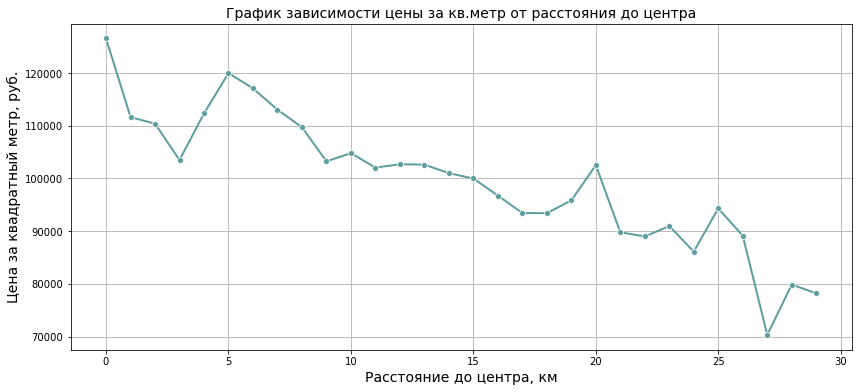

In [58]:
plt.figure(figsize = (14,6))
sns.lineplot(data=price_to_center, x="km_to_center", y="median", marker='o', color='#5F9EA0',linewidth = 2)
plt.title('График зависимости цены за кв.метр от расстояния до центра', fontsize=14)
plt.xlabel('Расстояние до центра, км', fontsize=14)
plt.ylabel('Цена за квадратный метр, руб.', fontsize=14)
plt.grid()
plt.show()

Видим, что график меняется в районе 8 км, это и будем считать центральной зоной.

### Исследование недвижимости центральной части Санкт-Петербурга
Выделим сегмент квартир в центре. 

In [59]:
realty_center_spb = realty_spb[realty_spb['km_to_center'] <= 8]

Проанализируем центральную территорию города и изучим следующие параметры: цена, число комнат, высота потолков.

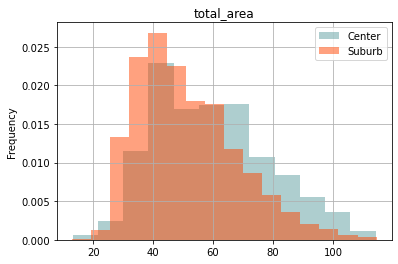

'Среднее для центра составляет 59.6, для остальной части города - 51.6'

'Медиана для центра составляет 57.8, для остальной части города - 48.0'

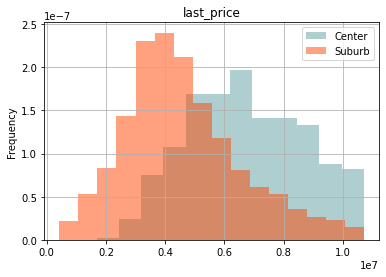

'Среднее для центра составляет 6730549.8, для остальной части города - 4601340.9'

'Медиана для центра составляет 6650000.0, для остальной части города - 4300000.0'

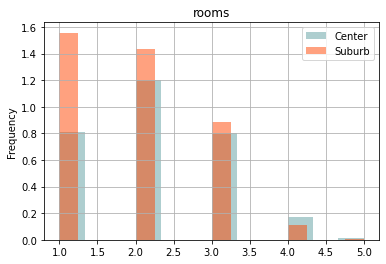

'Среднее для центра составляет 2.1, для остальной части города - 1.9'

'Медиана для центра составляет 2.0, для остальной части города - 2.0'

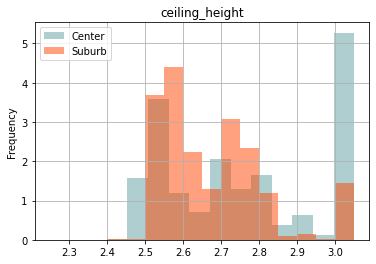

'Среднее для центра составляет 2.8, для остальной части города - 2.7'

'Медиана для центра составляет 2.8, для остальной части города - 2.6'

In [60]:
list_columns_spb = ['total_area', 'last_price', 'rooms', 'ceiling_height']

for column in list_columns_spb:
    
    ax = realty_center_spb.plot(
    kind='hist',
    y=column,
    bins=int(np.ceil(np.log2(len(realty_center_spb[column]))) + 1),
    range=(realty_center_spb[column].min(), realty_center_spb[column].max()),
    color = '#5F9EA0',
    grid = True,
    alpha=0.5,
    density=True,
    title = column,
    label='Center'
    ) 
    
    data_cleaned.plot(
    kind='hist',
    y=column,
    bins=int(np.ceil(np.log2(len(data_cleaned[column]))) + 1),
    range=(data_cleaned[column].min(), data_cleaned[column].max()),
    color = '#FF4500',
    grid = True,
    alpha=0.5,
    ax=ax,
    density=True,
    title = column,
    label='Suburb'
    ) 

    plt.show()
    display('Среднее для центра составляет {:.1f}, для остальной части города - {:.1f}'.format(realty_center_spb[column].mean(), data_cleaned[column].mean()))
    display('Медиана для центра составляет {:.1f}, для остальной части города - {:.1f}'.format(realty_center_spb[column].median(),data_cleaned[column].median()))


**Выводы** 

Квартиры в центре Санкт-Петербурга в среднем имеют следующие параметры:

1. Общая площадь равна примерно 57,8 м², в то время, как в части города с учетом отдаленных районов - 48 м².

2. Стоимость около 6,65 млн. рублей, что выше на 2,35 млн, чем средняя цена для части города с пригородом.

3. Двухкомнтаная квартира - самый популярный формат недвижимости для центральной части города. Интересно, что трехкомнатные квартиры представлены наравне с однокомнатными, и это второй по популярности формат.

4. Высота потолков в центре выше примерно на 20 см, чем в остальной части города и ближайших населённых пунктах. Лидирующая позиция за квартирами с высотой потолков 3 м, что неудивительно, ведь основная часть старого фонда, знаменитая своими просторными квартирами, расположена именно в центре.

Посмотрим, как число комнат, этаж и удалённость от центра влияют на стоимость квартиры.

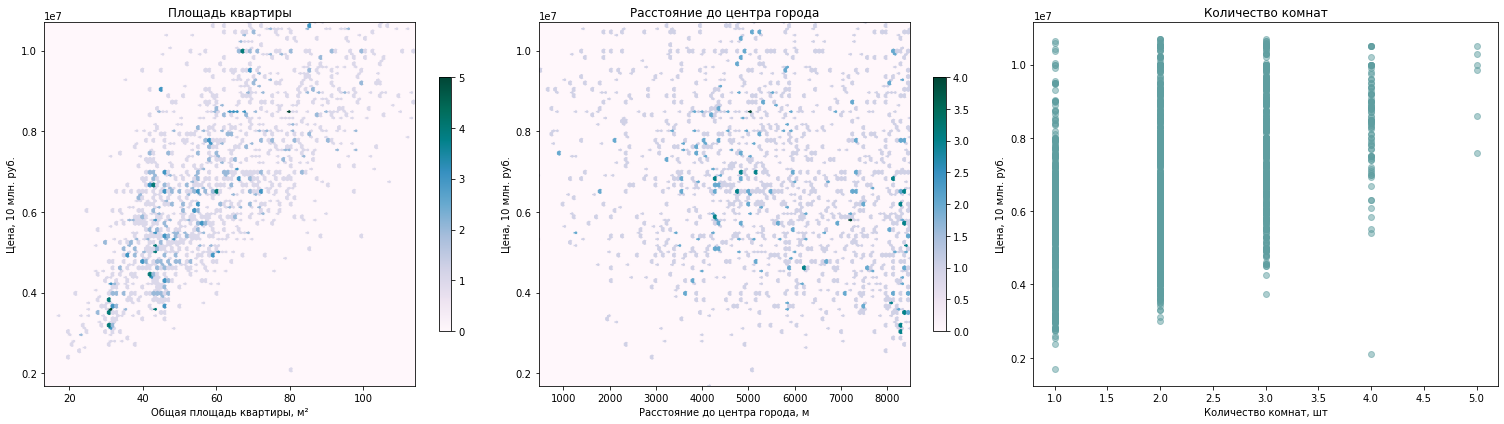

In [61]:
xmin_1 = realty_center_spb['total_area'].min()
xmax_1 = realty_center_spb['total_area'].max()
ymin_1 = realty_center_spb['last_price'].min()
ymax_1 = realty_center_spb['last_price'].max()

xmin_2 = realty_center_spb['city_сenters_nearest'].min()
xmax_2 = realty_center_spb['city_сenters_nearest'].max()


fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(21, 6))


ax1.set_title('Площадь квартиры')
ax1.set_ylabel('Цена, 10 млн. руб.')
ax1.set_xlabel('Общая площадь квартиры, м²')
hb1 = ax1.hexbin(realty_center_spb['total_area'], realty_center_spb['last_price'], cmap='PuBuGn')
ax1.set(xlim=(xmin_1, xmax_1), ylim=(ymin_1, ymax_1))
cb1 = fig.colorbar(hb1, ax=ax1,shrink=0.7)

ax2.set_title('Расстояние до центра города')
ax2.set_ylabel('Цена, 10 млн. руб.')
ax2.set_xlabel('Расстояние до центра города, м')
hb2 = ax2.hexbin(realty_center_spb['city_сenters_nearest'], realty_center_spb['last_price'], cmap='PuBuGn')
ax2.set(xlim=(xmin_2, xmax_2), ylim=(ymin_1, ymax_1))
cb2 = fig.colorbar(hb2, ax=ax2,shrink=0.7)

ax3.set_title('Количество комнат')
ax3.set_ylabel('Цена, 10 млн. руб.')
ax3.set_xlabel('Количество комнат, шт')
hb3 = ax3.scatter(realty_center_spb['rooms'], realty_center_spb['last_price'], c='#5F9EA0', alpha=0.5)

plt.tight_layout()
plt.show()

1. Из первого графика видим, что цена квартиры так же, как и для остальной части города, практически линейно зависит от её площади: чем больше площадь, тем больше стоимость.

2. Интересно, что как таковой зависимости между ценой и расположением квартиры относительно центра в этой части города не прослеживается. Но видно, что разброс цен для квартир в 8 км от центра больше, еще можно отметить, что эта часть более густонаселенная. Для квартир в шаговой доступности от исторического центра цены начинаются от 6 млн.

3. На третьем графике явно видно, что с увеличением числа комнат увеличивается и стоимость квартиры.

2. Изучим зависимость цены от того, на каком этаже расположена квартира

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


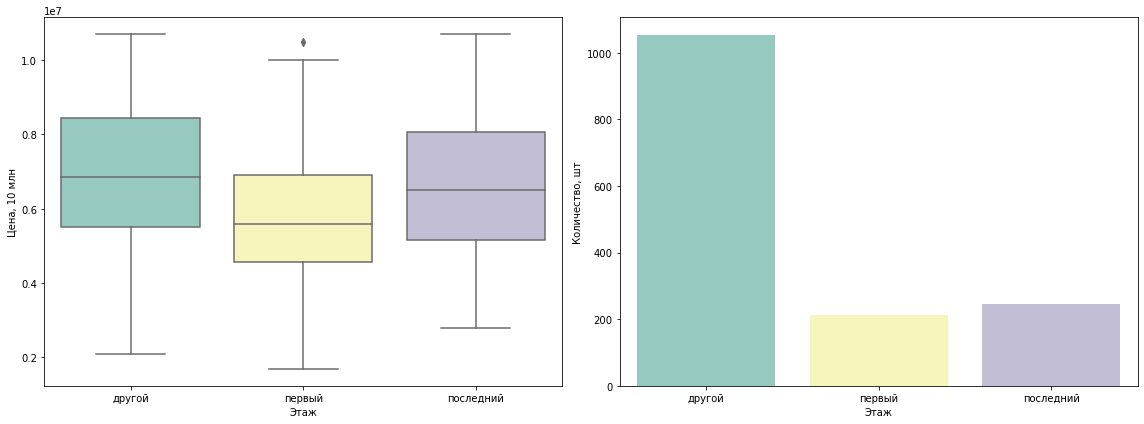

In [62]:
f, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(y="last_price", 
            x="floor_group", 
            orient='v', 
            data=realty_center_spb, 
            palette="Set3",
            ax=axes[0]).set(xlabel='Этаж', ylabel='Цена, 10 млн')

sns.countplot(realty_center_spb['floor_group'],  
              orient='v',
              palette="Set3",
              ax=axes[1]).set(xlabel='Этаж', ylabel='Количество, шт')

plt.tight_layout()
plt.show()

Видим, что стоимость квартир на первых этажах по-прежнему ниже чем у квартир, расположенных на средних этажах здания. А вот квартиры, расположенные на последних этажах, ценятся примерно, как и на средних.

3. Посмотрим, есть ли зависимость цены квартиры от даты размещения: дня недели, месяца и года.

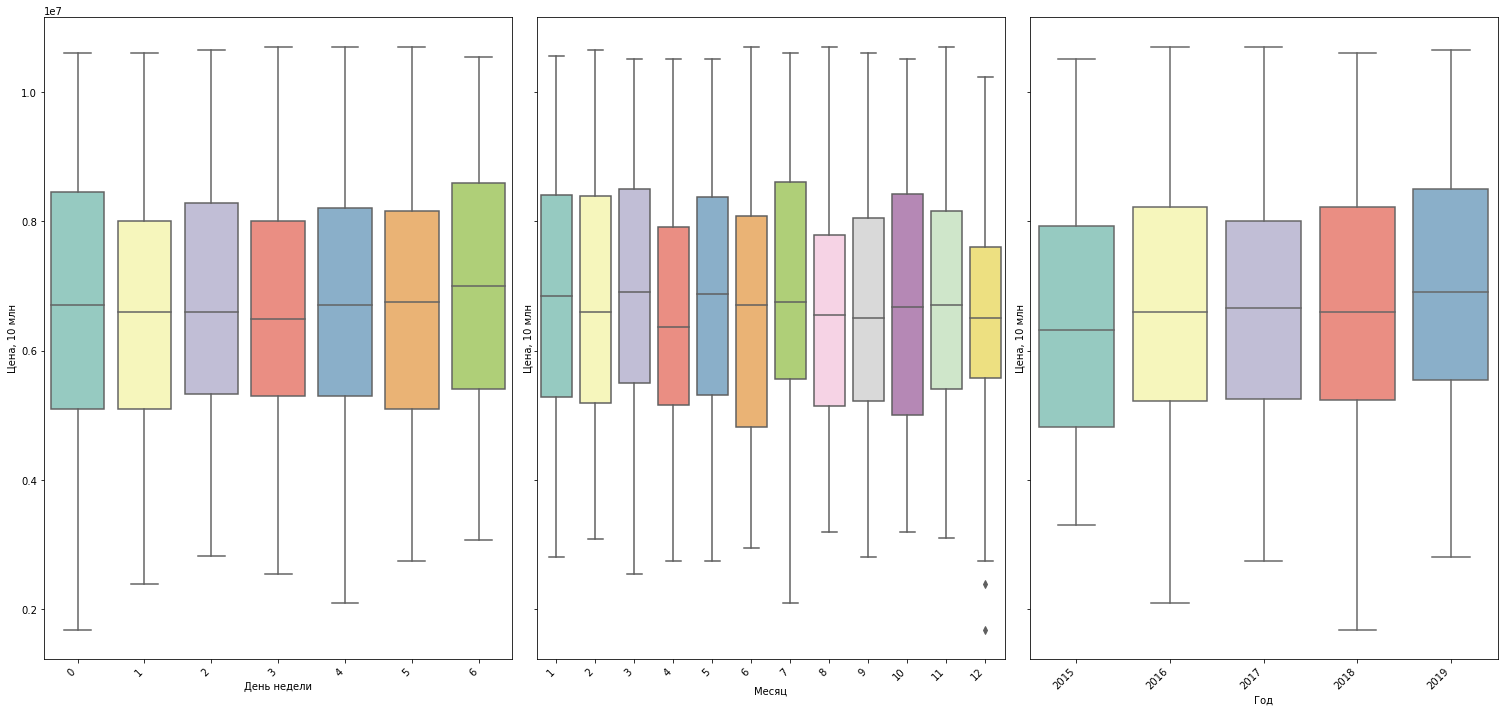

In [63]:
data_publication = ['day_of_publication', 'month_of_publication', 'year_of_publication']
col_name = ['День недели', 'Месяц', 'Год']


ncols = len(data_publication)
fig, axes = plt.subplots(1,ncols, sharey = True, figsize=(21,10))

for col, ax in zip(data_publication, axes.flatten()):
    sns.boxplot(y='last_price', x= col, data=realty_center_spb, orient='v', ax=ax, palette="Set3").set(xlabel=col_name[data_publication.index(col)], ylabel='Цена, 10 млн')
    fig.autofmt_xdate(rotation=45)
    
plt.tight_layout()
plt.show()

1. Интересно, что квартиры в центральной части города продаются по большей стоимости в воскресенье, а вот в разгар рабочей недели: в четверг, среду и вторник, - стоимость минимальна.

2. Также нет зависимости между месяцем публикации и ценой, однако, в апреле квартиры продаются по более низким ценам, а вот в марте их стоимость максимальна.

3. С годами, как и для остальной части города, в центре наблюдается тенденция роста цен на недвижимость. 

**Выводы**

Были изучены следующие факторы, влияющие на стоимость квартиры распоженных в центральной части города:

1. Цена квартиры так же, как и для остальной части города, практически линейно зависит от её площади: чем больше площадь, тем больше стоимость.

2. Явной зависимости между ценой и расположением квартиры относительно центра в этой части города не прослеживается. Разброс цен для квартир в 8 км от центра больше, еще можно отметить, что эта часть более густонаселенная. Для квартир в шаговой доступности от исторического центра цены начинаются от 6 млн.

3. Стоимость квартир на первых этажах ниже чем у квартир, расположенных на средних этажах здания. Квартиры, расположенные на последних этажах, ценятся примерно, как и на средних, в отличие от удаленных районов города.

4. Выгоднее совершать покупку квартиры в середине рабочей недели: в четверг, среду и вторник. А вот в воскресенье стоимость квартиры в центре максимальна.

5. Так же нет зависимости между месяцем публикации и ценой.

6. С годами, как и для остальной части города, в центре наблюдается тенденция роста цен на недвижимость. 

## Общий вывод

Итак, в ходе исследования данных сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, нужно было выделить и описать параметры, необходимые для определения рыночной стоимости объектов недвижимости. Проведено исследование рынка недвижимости центральной части Санкт-Петербурга и его отдаленных райнов. В результате были сделаны следующие выводы:

1. Выбраны 10 населённых пунктов с наибольшим числом объявлений, среди них были выделены районы с самой высокой и низкой стоимостью жилья.

- Лидером среди наиболее доступных для покупки недвижимости районов стал Выборг, далее следуют Всеволжск и Гатчина.

- Самая дорогая недвижимость расположена в Санкт-Петербурге, Пушкине и деревне Кудрово.

2. В результате анализа цены за квадратный метр в зависимости от расположения квартиры относительно центра была выделена центральная зона Санкт-Петербурга. За границу была принята окружность радиусом 8 км.

3. Для недвижимости города с учетом отдаленных райнов, а затем только для его центральной части были изучены следующие параметры: площадь, цена, число комнат, высота потолков. Получены следующие результаты:

- Квартиры, расположенные в центре, в среднем, больше: общая площадь квартиры в Санкт-Петербурге равна примерно 57,8 м², в то время, как в части города с учетом отдаленных районов - 48 м². 

- Стоимость недвижимости, предсказуемо, больше в центре: так, средняя цена квартиры в центральной части около 6,65 млн.рублей, что на 35% выше, чем для остальной части города.

- Двухкомнтаная квартира - самый популярный формат недвижимости для центральной части города. Трехкомнатные квартиры представлены наравне с однокомнатными, и это второй по популярности формат. Для отдаленных районов большинство квартир, выставленных на продажу, двух- и однокомнатные.

- Высота потолков в центре выше примерно на 20 см, чем в остальной части города и ближайших населённых пунктах.

4. Далее были выделены и описаны факторы, влияющие на стоимость квартиры: общая площадь, число комнат, этаж, удалённость от центра, дата размещения объявления. Были сделаны следующие выводы:

- Стоимость квартиры линейно зависит от ее площади: чем больше площадь, тем выше и цена. То же можно сказать и о числе комнат. Это справедливо как для центра, так и для других районов города.

- Квартиры на первых этажах стоят дешевле, чем квартиры, расположенных на средних этажах здания. В центре недвижимость, расположенная на последних этажах, ценится примерно, как и на средних, в отличие от удаленных районов города.

- Для отдаленных районов характерна отрицательная корреляция между стоимостью квартиры и ее расположением относительно центра. А в центральной части явной зависимости между этими параметрами не прослеживается. Хотя по графику видно, что наиболее дорогое жилье расположено в шаговой доступности от центра города.

- Явной зависимости между датой размещения объявления и стоимостью квартиры нет. Но можно заметитить, что:

1) Покупка квартиры в центре обойдется дешевле, если совершать ее в разгар рабочей недели: в четверг, среду и вторник. В воскресенье стоимость максимальна. Для удаленных районов выгоднее совершать покупку в воскресенье.

2) Лучший месяц для покупки квартиры в центре - апрель, для остальной части города - июнь. Дороже квартира в центраной части обойдется, если совершать покупку в марте, для отдаленных районов - в ноябре.

- С годами для всего города наблюдается тенденция роста цен на недвижимость. 